In [1]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
%matplotlib inline

osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.


In [70]:
# parameters cell
meshpath = '/p/project/chhb19/streffing1/input/fesom2/core2/'
abg = [0, 0, 0]
input_paths = ['/p/scratch/chhb19/jstreffi/runtime/awicm-3.1/PICT/outdata/fesom/',
               '/p/scratch/chhb19/jstreffi/runtime/awicm-3.1/PIC4/outdata/fesom/',
               '/p/largedata/hhb19/jstreffi/runtime/awicm-3.1/PIC3/outdata/fesom/'
               ]
input_names = ['PICT','PIC3', 'PIC4']
years = range(1850, 1900)
figsize=(10, 5)
hemisphere = ['N','S']
dpi = 200
ofile = None

In [71]:
if input_names is None:
    input_names = []
    for run in input_paths:
        run = os.path.join(run, '')
        input_names.append(run.split('/')[-2])

In [72]:
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)

/p/project/chhb19/streffing1/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /p/project/chhb19/streffing1/input/fesom2/core2/pickle_mesh_py3_fesom2


In [73]:
a_ice = OrderedDict()
# data_reference = pf.get_data(reference_path, variable, reference_years, mesh, depth = depth, silent=True)
for exp_path, exp_name  in zip(input_paths, input_names):
    a_ice[exp_name] = {}
    a_ice[exp_name]['data'] = pf.get_data(exp_path, 'a_ice', years, mesh, how=None, compute=False, silent=True)

In [74]:
ice_area = {}
for key, value in a_ice.items():
    ice_area[key] = {}
    ice_area[key]['data'] = pf.ice_area(value['data'], mesh, hemisphere=hemisphere)

In [75]:
ice_area

{'PICT': {'S': <xarray.DataArray 'siareas' (time: 600)>
  array([9.58244065e+12, 6.89204368e+12, 6.10387005e+12, 8.00706219e+12,
         1.09542668e+13, 1.38258242e+13, 1.61709329e+13, 1.84528753e+13,
         1.94961943e+13, 1.94409298e+13, 1.71712624e+13, 1.31912332e+13,
         8.37107777e+12, 5.04593575e+12, 4.53961333e+12, 6.57688602e+12,
         9.87436201e+12, 1.29703437e+13, 1.61690020e+13, 1.86377687e+13,
         1.94292593e+13, 1.82507071e+13, 1.52824908e+13, 1.05474543e+13,
         5.44939876e+12, 2.91210998e+12, 2.81876411e+12, 4.50833130e+12,
         6.83109781e+12, 9.43747664e+12, 1.28244704e+13, 1.53605923e+13,
         1.65628884e+13, 1.57755476e+13, 1.27215894e+13, 8.75417746e+12,
         4.54678910e+12, 2.42112821e+12, 2.40130601e+12, 3.85601174e+12,
         6.21422109e+12, 8.77666874e+12, 1.14556606e+13, 1.38161782e+13,
         1.47508294e+13, 1.42420364e+13, 1.14850879e+13, 7.00531763e+12,
         2.52175985e+12, 9.32481265e+11, 7.59212083e+11, 2.04333663e

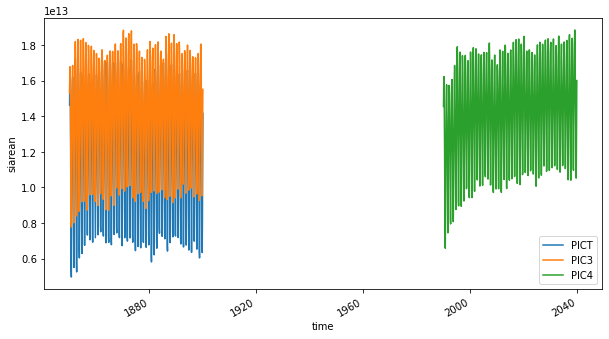

In [62]:
plt.figure(figsize=figsize)
n = 0 
for key, value in ice_area.items():
    if n<10:
        value['data'].plot(label=key, linestyle='-')
    else:
        value['data'].plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_icearea.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

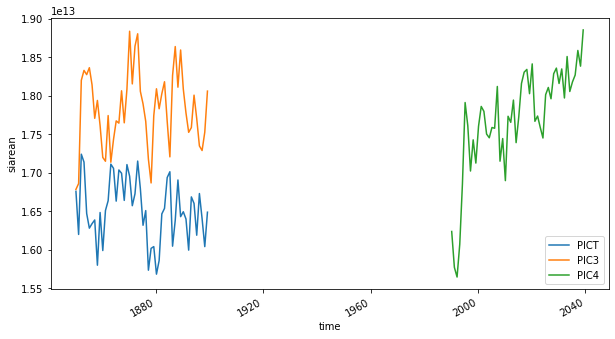

In [63]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_area.items():
    toplot = value['data'].sel(time=value['data'].time.dt.month.isin([3]))
    if n < 10:
        toplot.plot(label=key, linestyle='-')
        
    else:
        toplot.plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_icearea_march.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

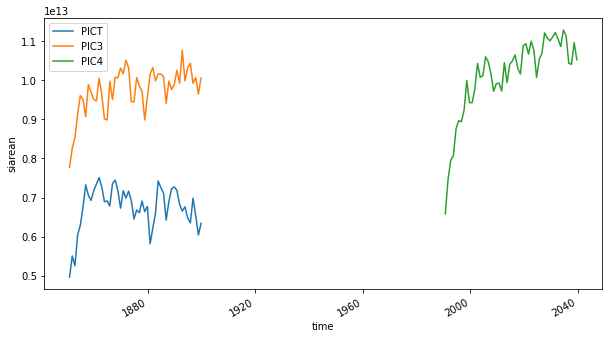

In [64]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_area.items():
    toplot = value['data'].sel(time=value['data'].time.dt.month.isin([9]))
    if n < 10:
        toplot.plot(label=key, linestyle='-')
        
    else:
        toplot.plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_icearea_september.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

In [65]:
ice_ext = {}
for key, value in a_ice.items():
    ice_ext[key] = {}
    ice_ext[key]['data'] = pf.ice_ext(value['data'], mesh, hemisphere=hemisphere)

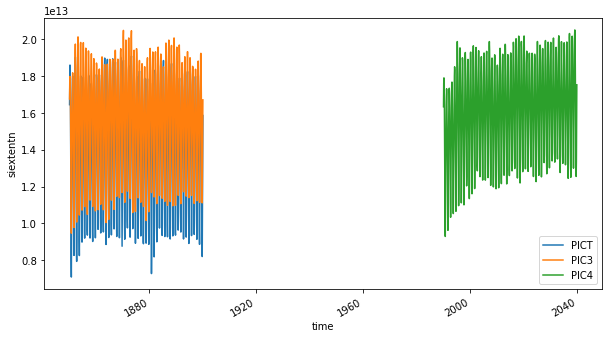

In [66]:
plt.figure(figsize=figsize)
n = 0 
for key, value in ice_ext.items():
    if n<10:
        value['data'].plot(label=key, linestyle='-')
    else:
        value['data'].plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_iceext.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

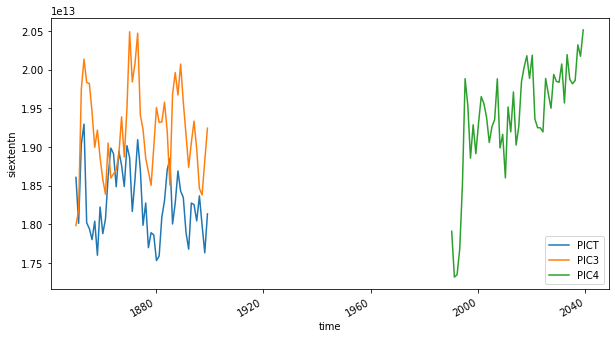

In [67]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_ext.items():
    toplot = value['data'].sel(time=value['data'].time.dt.month.isin([3]))
    if n < 10:
        toplot.plot(label=key, linestyle='-')
        
    else:
        toplot.plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_iceext_march.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

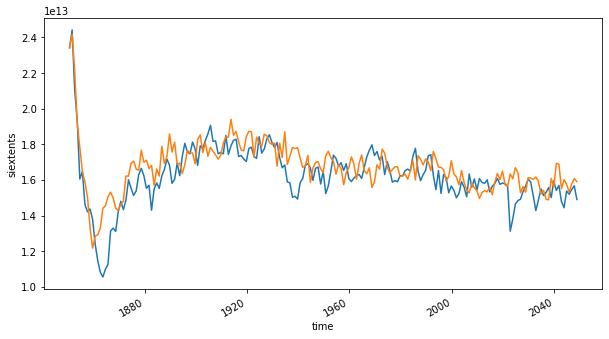

In [38]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_ext.items():
    toplot = value['data'].sel(time=value['data'].time.dt.month.isin([9]))
    if n < 10:
        toplot.plot(label=key, linestyle='-')
        
    else:
        toplot.plot(label=key, linestyle='--')
    n = n+1
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_iceext_september.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

In [39]:
m_ice = OrderedDict()
# data_reference = pf.get_data(reference_path, variable, reference_years, mesh, depth = depth, silent=True)
for exp_path, exp_name  in zip(input_paths, input_names):
    m_ice[exp_name] = {}
    m_ice[exp_name]['data'] = pf.get_data(exp_path, 'm_ice', years, mesh, how=None, compute=False, silent=True)

In [40]:
ice_vol = {}
for key, value in m_ice.items():
    ice_vol[key] = {}
    ice_vol[key]['data'] = pf.ice_vol(value['data'], mesh, hemisphere=hemisphere)

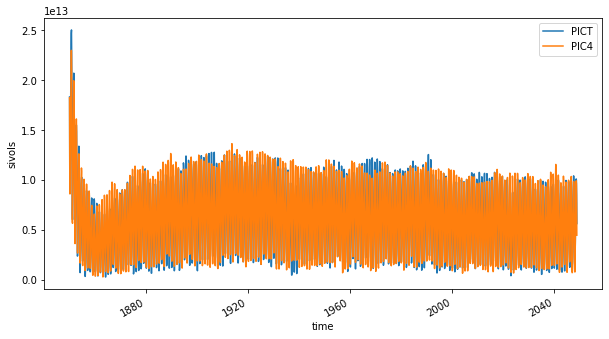

In [41]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_vol.items():
    if n<10:
        value['data'].plot(label=key, linestyle='-')
    else:
        value['data'].plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_icevol.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

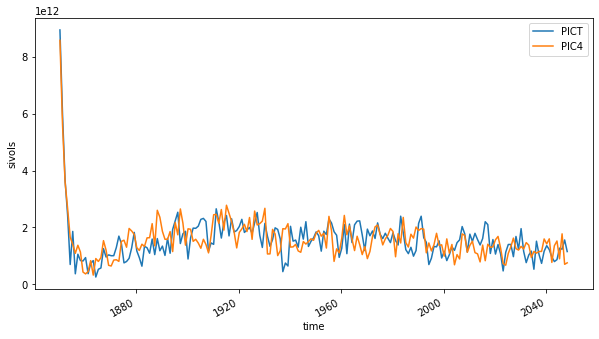

In [42]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_vol.items():
    toplot = value['data'].sel(time=value['data'].time.dt.month.isin([3]))
    if n < 10:
        toplot.plot(label=key, linestyle='-')
        
    else:
        toplot.plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_icevol_march.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

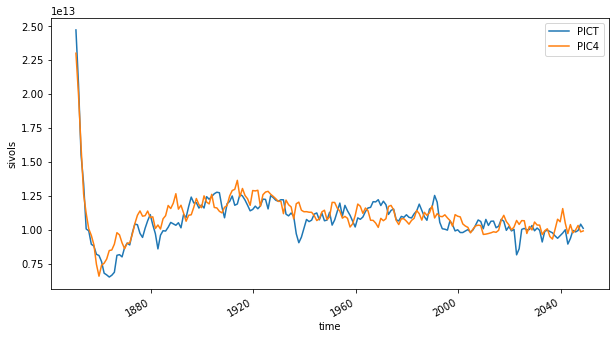

In [43]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_vol.items():
    toplot = value['data'].sel(time=value['data'].time.dt.month.isin([9]))
    if n < 10:
        toplot.plot(label=key, linestyle='-')
        
    else:
        toplot.plot(label=key, linestyle='--')
    n = n+1
plt.legend()
if ofile is not None:
    ofile_long = f"{ofile}_{hemisphere}_icevol_september.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')